### Statistical manifold

- Coordinate System is the parameters of our model
    - In Univariate Normal this is ~ Euclidean 2 Space
    - In Multivariate Normal this is ~ Euclidean $n+\frac{n*(n-1)}{2}$ space
- Very informative read on Fisher Information Geometry https://www.mdpi.com/1099-4300/22/4/404/htm

In [18]:
from geomstats.information_geometry.normal import NormalDistributions
from scipy.stats import norm

normal = NormalDistributions()
fisher_metric = normal.metric # note the fisher metric is explicity defined 

In [38]:
# define two parameterized normal distributions

point_a = gs.array([1, 3])
point_b = gs.array([7, 1])

# define this as parameterized geodesic curve  for some arbitrary time values between a and b
geodesic_ab_fisher = fisher_metric.geodesic(point_a, point_b)

# note the geodesc equation has an explicit solution here as univariate normal

n_points = 20
t = gs.linspace(0, 1, n_points)

Below is a plot on the geodesic

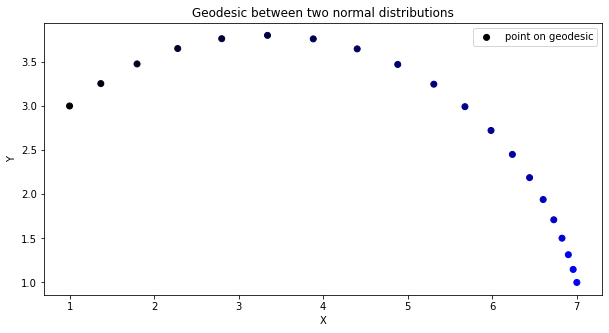

In [39]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
cc = gs.zeros((n_points, 3))
cc[:, 2] = gs.linspace(0, 1, n_points)

visualization.plot(
    geodesic_ab_fisher(t), # compute fisher distance between each points 
    ax=ax,
    space="H2_poincare_half_plane",
    label="point on geodesic",
    color=cc,
    
)


ax.set_title("Geodesic between two normal distributions")
ax.legend();

In [40]:
print("Fisher-Rao Distance is",fisher_metric.dist(point_a,point_b))

Fisher-Rao Distance is 2.725748404364811


### Wassertein Distance
- Distance metric for probability measures
- View in terms of optimal transport of measures (earth moving problem)


/home/jbohn/miniconda3/envs/research/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.


Text(0.5, 1.0, 'Optimal Transport Between two Normal PDFs')

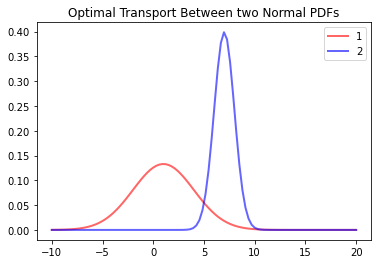

In [66]:
from geomstats.geometry.euclidean import Euclidean

plane = Euclidean(2)
wasserstein_metric = plane.metric

a=1
b=3
c=7
d=1
ab = gs.array([a, b])
cd= gs.array([c,d])

# In an information geometry perspective the chosen coordinate system is the parameters of our model
mean=np.linspace(0,10,100) 
var=np.linspace(0,5,100)

x = np.linspace(-10,20, 100)
t=np.linspace(0,1,20) # parameterization of line integral


plt.plot(x, norm.pdf(x,loc=a,scale=b),
       'r-', lw=2, alpha=0.6, label='1')
plt.plot(x, norm.pdf(x,loc=c,scale=d),
       'r-', lw=2, alpha=0.6, label='2',color='blue')
plt.legend()
plt.title("Optimal Transport Between two Normal PDFs")

Generate random tangent vectors at a point

In [67]:
n=100
tan=np.array([])
for i in range (0,n):
    tan=np.append(tan,[plane.random_tangent_vec(mean[1])])
tan=tan.reshape(n,2)
print("One tangent Vector at ",mean[1] ,"is", tan[-1])

One tangent Vector at  0.10101010101010101 is [ 0.33369883 -0.03470509]


In [69]:
# generate a parameterized curve that traverses the shortest geodesic between two points on the manifold
geodesic_cd_wasserstein = wasserstein_metric.geodesic(mean,var)

# generate the value of vector field to be integrated ~ finnicky for dtypes
wasserstein_metric.geodesic_equation((np.array([mean[1]]),np.array(tan[10])),t)

array([[ 0.01053973,  1.25107883],
       [-0.        , -0.        ]])

In [70]:
wasserstein_metric.christoffels(np.array([mean[1]]))

array([[[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]]])

 Exponential Map that maps values of the tangent space to underlying space...further question can differential equations be thought of as solutions of

In [71]:
wasserstein_metric.exp(tan[0],mean[1])

array([0.2299405 , 0.08604868])

Actual Wassertstein Distance between probability distributions

In [72]:
wasserstein_metric.dist(mean,var)

28.940319409814528

### Real-Life Example